In [1]:
from keras.models import load_model
from keras.preprocessing import image
from keras import models
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
model = load_model(r'F:\SolarRadioBurst\typeII\typeII_binary_normalization_50_1.1.h5')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 99, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 97, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 23, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 141312)           

In [4]:
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(input = model.input, outputs = layer_outputs)


D:\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("co...)`
  


In [11]:
path = r'G:\test\normal_x\typeII1.2\train\II\CG199509162102_FN_20_26.jpg.jpg'

In [12]:
img = image.load_img(path, target_size=(400, 200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

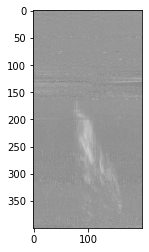

In [13]:
plt.imshow(img_tensor[0])
plt.show()

In [14]:
activations = activation_model.predict(img_tensor)

result = model.predict(img_tensor)
print(result)

[[1.0176633e-12]]


D:\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


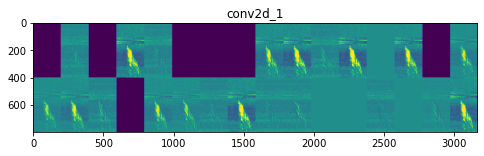

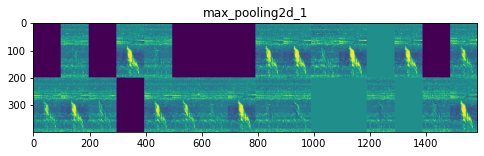

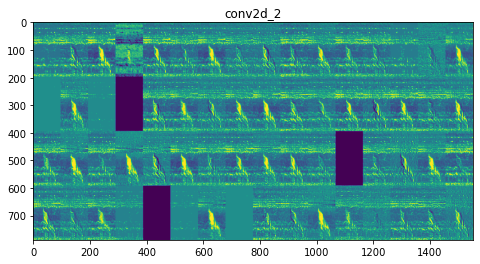

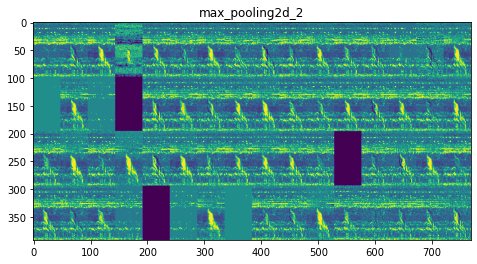

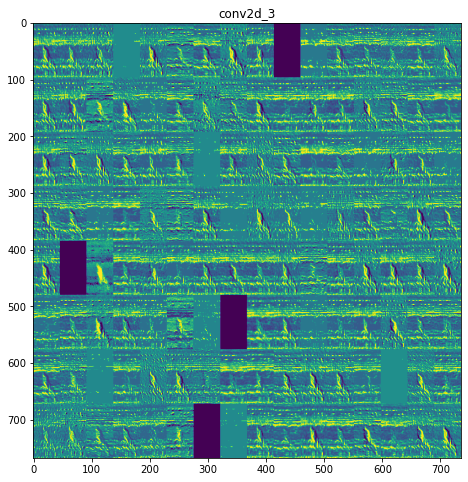

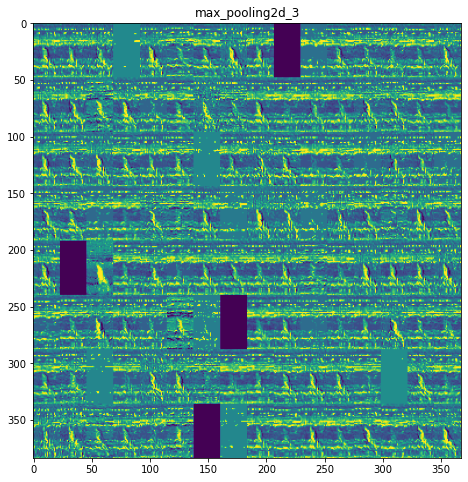

In [15]:
layer_names = []

for layer in model.layers[:6]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size1 = layer_activation.shape[1]
    size2 = layer_activation.shape[2]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size1*n_cols,images_per_row*size2 ))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size1 : (col + 1) * size1,row * size2 : (row + 1) * size2] = channel_image


    scale = 1. / size1
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



